# Heart Disease

    This is my first data science notebook. The goal is to correctly predict if someone has Heart  Disease.  
    I aim to utilize cross-validation to determine the best-performing algorithm and subsequently fine-tune it

**age**    Age in years  

**sex**    Sex (1=male; 0=female)  

**cp**     Chest pain type (1=typical angina; 2= atypical angina; 3= non-anginal pain; 4=asymptomatic)

**trestbps** Resting blood pressure (mm Hg)

**chol** Serum cholesterol (mg/dL)

**fbs** Fasting blood sugar > 120 mg/dL (1=True;0=False)

**restecg** Resting electrocardiographic results (0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach** Maximum heart rate achieved 

**exang** Exercise-induced angina (1=yes; 0= no)

**oldpeak** ST depression induced by exercise relative to rest

**slope** The slope of peak exercise ST segment  (1=upsloping; 2=flat; 3=downsloping)
 
**ca** Number of major vessels (0-3) colored by fluoroscopy

**thal** A blood disorder called thalassemia (3 = normal; 6 =fixed defect; 7 = reversible defect)

**target** Heart Disease (0=no; 1=yes)


## Overview

1\) Understanding the data  
2\) Data Cleaning  
3\) Data Exploration  
4\) Data Processing  
5\) Modeling  
6\) Model Evaluation


## Understanding the data

- **describe**
- **info**
- **plots**

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


sns.set_style("darkgrid")

In [32]:
df = pd.read_csv("content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From df.describe we can se that some features has outliers (trestbps, chol and thalach).  
We will handle with that later

In [35]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True
plt.rc("font",size=14)

In [36]:
CATEGORICAL=['sex','cp','fbs','restecg','exang','slope','ca','thal']
NUMERIC=['age','trestbps','chol','thalach','oldpeak']

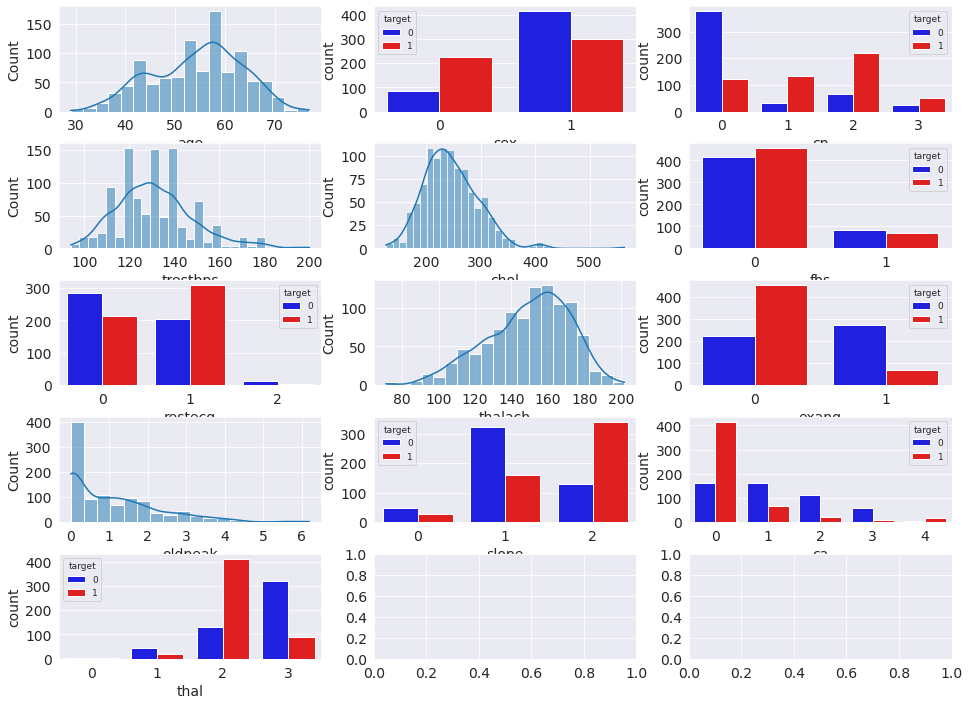

In [37]:
fig,ax=plt.subplots(5,3,figsize=(16,12))

plt.rc('font', size=9)
plt.subplots_adjust(hspace = 0.3)

for i in range(5):
    for j in range(3):
        col=df.columns[(j+i*3)]        
        if col == "target":
            break
        elif col in CATEGORICAL:               
            sns.countplot(x=df[col],hue=df['target'],ax=ax[i,j],palette=['blue','red'])            
        elif col in NUMERIC:
            
            sns.histplot(df[col],kde=True,ax=ax[i,j])
            # sns.histplot(df['target'],ax=ax[i,j])

            

## Data Cleaning

- **duplicates entries**
- **outliers**

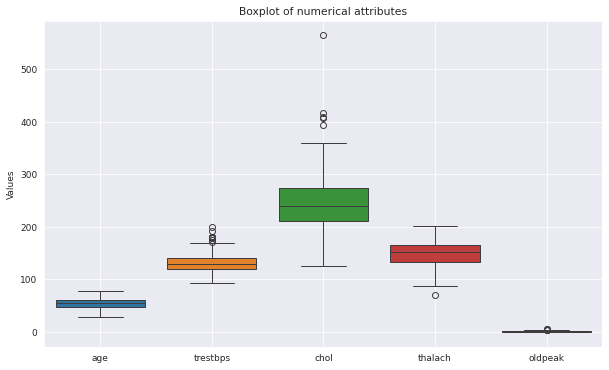

In [38]:
# dropping duplicates entries
df=df.drop_duplicates()

# BoxPlot of some features that has outliers
fig,ax=plt.subplots()
ax=sns.boxplot(data=df[NUMERIC])
ax.set_ylabel("Values");
ax.set_title("Boxplot of numerical attributes");
plt.grid(True)


In [39]:
# # Dropping the outliers
hd1=df[df['trestbps']<df['trestbps'].quantile(0.973)]
hd2=hd1[hd1['chol']<hd1['chol'].quantile(0.986)]
hd3=hd2[hd2['thalach']>hd2['thalach'].quantile(0.001)]
df=hd3

## Data Exploration

- **Correlations**
- **Plots of some features**
- **Some interesting analysis**

A priori we can say that the most attributes correlated with heart disease are: 
- Chest Pain (cp)
- Person's Maximum Heart Rate Achieved (thalach)
- Exercise Induced Angina (exang)
- ST depression induced by exercise relative to rest (oldpeak)
- Number of major vessels (ca)

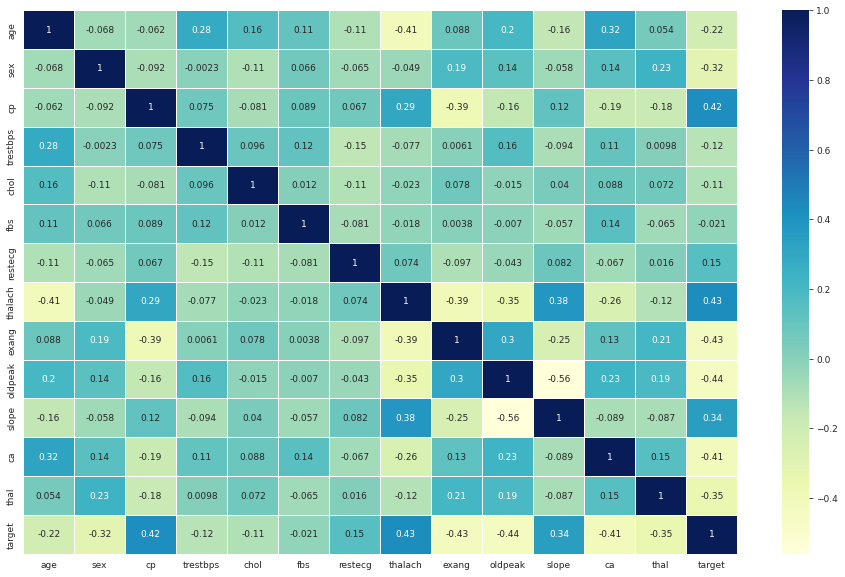

In [10]:
fig,ax=plt.subplots(figsize=(16,10))
ax=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=0.5)

The average age of people with Heart Disease is: 52 years olds
The average age of people without Heart Disease is: 56 years olds


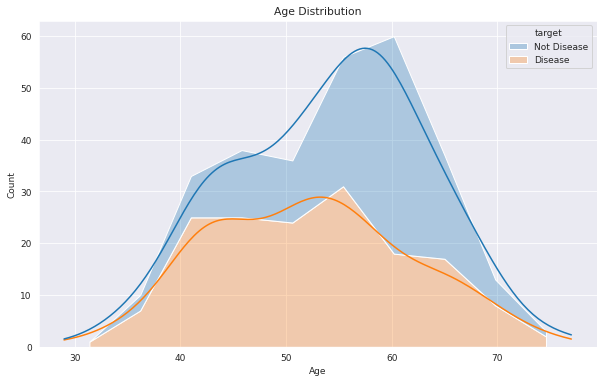

In [11]:
avg_disease=df[df['target']==1]['age'].mean()
avg_not_disease=df[df['target']==0]['age'].mean()

print(f"The average age of people with Heart Disease is: {int(avg_disease)} years olds")
print(f"The average age of people without Heart Disease is: {int(avg_not_disease)} years olds")

fig,ax=plt.subplots()
ax=sns.histplot(data=df,x='age',hue='target',multiple='stack',kde=True,element='poly',alpha=0.3,bins=10)
ax.get_legend().texts[0].set_text('Not Disease')
ax.get_legend().texts[1].set_text('Disease')
ax.set_title('Age Distribution')
ax.set_xlabel('Age');

The percentage of females in dataset that have Heart Attack is 0.79%
The percentage of males in dataset that have Heart Attack is 0.45%


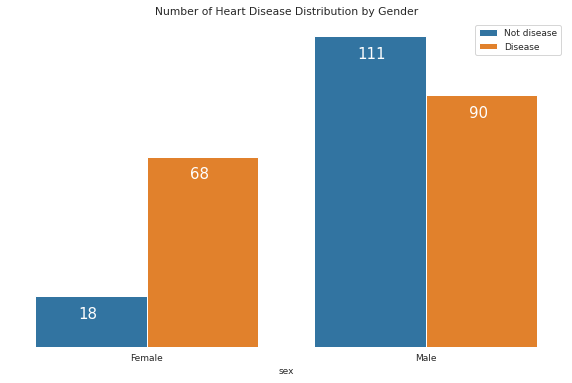

In [12]:
percentage_female=len(df[(df['sex']==0) & (df['target']==1)])/len(df[df['sex']==0])
percentage_male=len(df[(df['sex']==1) & (df['target']==1)])/len(df[df['sex']==1])

print(f"The percentage of females in dataset that have Heart Attack is {percentage_female:.2f}%")
print(f"The percentage of males in dataset that have Heart Attack is {percentage_male:.2f}%")

with sns.axes_style('white'):   
    fig,ax=plt.subplots()
    ax=sns.countplot(data=df,x='sex',hue='target')
    ax.set_title('Number of Heart Disease Distribution by Gender')
    ax.legend(['Not disease','Disease'])
    
    xticks_array = [label.get_text() for label in plt.gca().get_xticklabels()]
    ax.set_xticks(xticks_array,['Female','Male']);
    ax.set_yticks([])
    ax.set_ylabel(None)
    plt.grid(False)
    
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
    for i,bar in enumerate(ax.patches):
        if i<4:
            height=bar.get_height()
            plt.text(bar.get_x()+bar.get_width()/2-0.045,height-8,int(height),color='w',fontsize=15)
        else:
            break
        
              

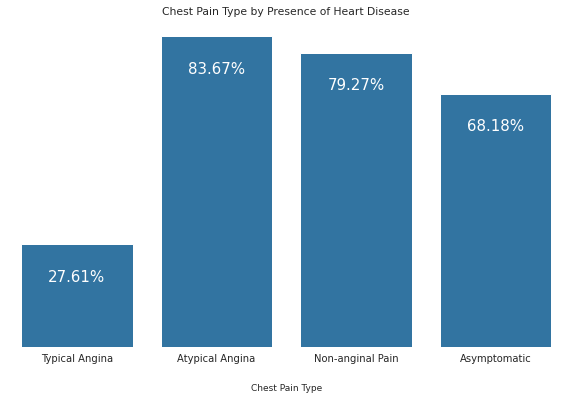

In [13]:

with sns.axes_style("white"):
    fig,ax=plt.subplots()
    ax=sns.barplot(data=df,x='cp',y='target',errorbar=None) 
    
    ax.set_title('Chest Pain Type by Presence of Heart Disease')
    ax.set_xlabel('Chest Pain Type',labelpad=20)
    ax.set_ylabel(None)
    ax.set_yticks([])
    ax.set_xticks(ax.get_xticks(),['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptomatic'],size=10)    
    
    plt.grid(False) 
    
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
    for bar in ax.patches:   
        height = bar.get_height()        
        plt.text(bar.get_x() + bar.get_width() / 2, height-0.1, f'{height*100:.2f}%', ha='center', color='w', fontsize=15)
        


The average maximum heart rate achieved of people with Heart Disease is 158 BPM with an standard desviation of 19 BPM
The average maximum heart rate achieved of people without Heart Disease is 138 BPM with an standard desviation of 21 BPM


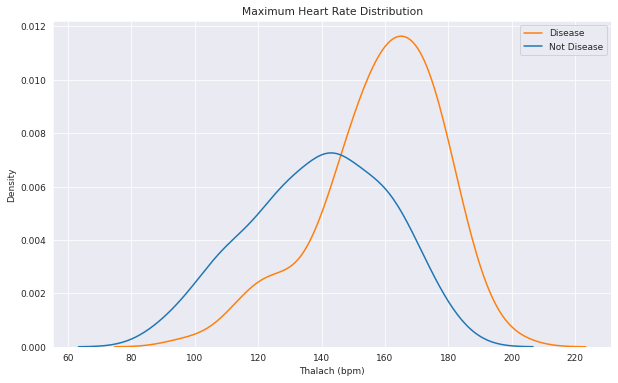

In [14]:
avg_disease=df[df['target']==1]['thalach'].mean()
avg_not_disease=df[df['target']==0]['thalach'].mean()

std_disease=df[df['target']==1]['thalach'].std()
std_not_disease=df[df['target']==0]['thalach'].std()

print(f"The average maximum heart rate achieved of people with Heart Disease is {int(avg_disease)} BPM with an standard desviation of {int(std_disease)} BPM")
print(f"The average maximum heart rate achieved of people without Heart Disease is {int(avg_not_disease)} BPM with an standard desviation of {int(std_not_disease)} BPM")

fig,ax=plt.subplots()

ax.set_title("Maximum Heart Rate Distribution")

# ax=sns.histplot(df,x='thalach',hue='target',kde=True,element='step',bins=30);
ax=sns.kdeplot(df,x='thalach',hue='target');
ax.set_xlabel("Thalach (bpm)")

# legend=['Not Disease','Disease']
# for i,dist in enumerate(ax.collections):
#     dist.set_label(legend[i-1])
ax.legend(['Disease','Not Disease']);


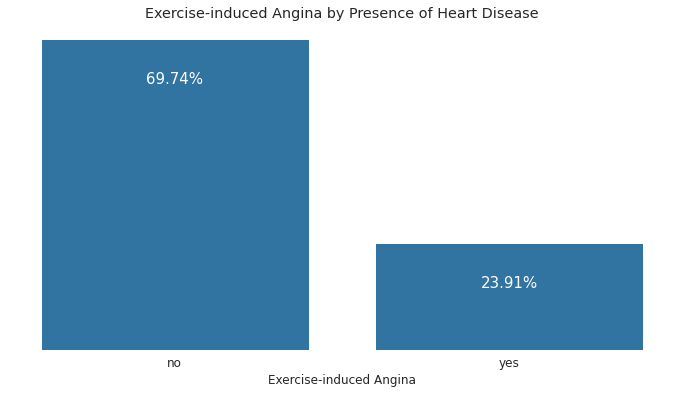

In [15]:

with sns.axes_style("white"):
    plt.figure(figsize=(12,6))
    plt.rc('font', size=12)
    plt.title('Exercise-induced Angina by Presence of Heart Disease')
    plt.xlabel('Exercise-induced Angina')
    plt.ylabel(None)
    plt.grid(False)
    plt.yticks([])
    plt.xticks([0,1],['no','yes'])
    
    bars=sns.barplot(data=df,x='exang',y='target',errorbar=None)       
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
    for bar in bars.patches:   
        height = bar.get_height()        
        plt.text(bar.get_x() + bar.get_width() / 2, height-0.1, f'{height*100:.2f}%', ha='center', color='w', fontsize=15)
        


## Data Preparation

- **train test split**
- **scaling the data**

In [57]:
# X and y data
X=df.drop('target',axis=1)
y=df['target']

# Train test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# MinMaxScaler
scaler=MinMaxScaler()
X_train[NUMERIC]=scaler.fit_transform(X_train[NUMERIC])
X_test[NUMERIC]=scaler.fit_transform(X_test[NUMERIC])

# Encoder
cols=['cp', 'restecg', 'slope', 'ca', 'thal']
X_train=pd.get_dummies(X_train,columns=cols,drop_first=True,dtype=int)
X_test=pd.get_dummies(X_test,columns=cols,drop_first=True,dtype=int)
X_test['thal_1']=0
X_test['ca_4']=0
X_test['restecg_2']=0
X_test=X_test.reindex(columns=X_train.columns)


(215, 22) (72, 22)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
62,0.825,1,0.000000,0.675532,0,0.309278,1,0.250000,0,0,...,0,1,0,0,1,0,0,0,1,0
271,0.250,1,0.285714,0.484043,0,0.804124,0,0.000000,1,0,...,0,0,1,0,0,0,0,0,0,1
109,0.500,1,0.142857,0.180851,0,0.134021,1,0.000000,0,0,...,0,1,0,1,0,0,0,0,1,0
328,0.900,1,0.428571,0.797872,0,0.144330,0,0.666667,0,0,...,0,1,0,0,0,1,0,0,1,0
286,0.750,0,0.571429,0.750000,0,0.391753,0,0.055556,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,0.775,0,0.857143,1.000000,0,0.577320,0,0.222222,0,1,...,0,0,1,0,0,0,0,0,1,0
333,0.500,0,0.142857,0.223404,0,0.649485,0,0.444444,0,1,...,0,1,0,0,0,0,0,0,1,0
212,0.400,1,0.714286,0.377660,0,0.340206,0,0.722222,0,0,...,0,1,0,0,0,0,0,0,0,1
228,0.450,1,0.400000,0.175532,1,0.917526,0,0.000000,1,0,...,0,0,1,0,0,0,0,0,1,0


## Modeling

In [17]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'GBC': GradientBoostingClassifier(),
    'Rede Neural': MLPClassifier(max_iter=10000)
}

accuracy =  {
    'Logistic Regression':[],
    'Decision Tree': [],
    'Random Forest': [],
    'KNN': [],
    'SVC': [],
    'GBC': [],
    'Rede Neural': []
}

recall =  {
    'Logistic Regression':[],
    'Decision Tree': [],
    'Random Forest': [],
    'KNN': [],
    'SVC': [],
    'GBC': [],
    'Rede Neural': []
}

auc=  {
    'Logistic Regression':[],
    'Decision Tree': [],
    'Random Forest': [],
    'KNN': [],
    'SVC': [],
    'GBC': [],
    'Rede Neural': []
}


for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    for ml in classifiers.items():
        modelo_name=ml[0]
        algoritmo=ml[1]

        scores_acc = cross_val_score(algoritmo, X_train, y_train, cv = kfold) 
        accuracy[modelo_name].append(scores_acc.mean())
        
        scores_recall = cross_val_score(algoritmo, X_train, y_train, cv = kfold,scoring='recall') 
        recall[modelo_name].append(scores_recall.mean())
        
        scores_auc = cross_val_score(algoritmo, X_train, y_train, cv = kfold,scoring='roc_auc')   
        auc[modelo_name].append(scores_auc.mean())


In [18]:
pd.DataFrame(accuracy).describe()

,Logistic Regression,Decision Tree,Random Forest,KNN,SVC,GBC,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.823117,0.754892,0.785628,0.806674,0.816429,0.775281,0.791306
std,0.008925,0.015678,0.008516,0.010458,0.009495,0.015524,0.010073
min,0.804762,0.716667,0.771645,0.785714,0.800216,0.744589,0.766667
25%,0.818236,0.748701,0.780844,0.799621,0.809794,0.766775,0.785823
50%,0.823160,0.755519,0.785065,0.804762,0.817424,0.774892,0.790476
75%,0.828193,0.762554,0.792695,0.814069,0.822511,0.785065,0.795455
max,0.841342,0.786147,0.803680,0.828788,0.833766,0.805844,0.818615


In [19]:
pd.DataFrame(recall).describe()

,Logistic Regression,Decision Tree,Random Forest,KNN,SVC,GBC,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.848887,0.780155,0.800467,0.824889,0.824854,0.788833,0.830109
std,0.012002,0.020487,0.019432,0.014994,0.016151,0.022126,0.017443
min,0.827439,0.731573,0.767370,0.791157,0.793334,0.737887,0.799555
25%,0.842634,0.769751,0.785637,0.817934,0.811640,0.778561,0.816083
50%,0.847238,0.782508,0.801878,0.824726,0.824378,0.789272,0.830853
75%,0.856739,0.789613,0.812035,0.833117,0.836610,0.799499,0.845434
max,0.878504,0.839098,0.837691,0.865926,0.867160,0.830212,0.859565


In [20]:
pd.DataFrame(auc).describe()

,Logistic Regression,Decision Tree,Random Forest,KNN,SVC,GBC,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.921835,0.758115,0.893244,0.878460,0.909360,0.882034,0.879972
std,0.007124,0.016047,0.009820,0.009952,0.007012,0.012990,0.010484
min,0.909254,0.731049,0.876074,0.856221,0.896135,0.846686,0.856963
25%,0.916778,0.748535,0.887108,0.873611,0.904581,0.872721,0.875408
50%,0.921753,0.758169,0.894049,0.878888,0.909078,0.882837,0.880143
75%,0.926863,0.762094,0.897843,0.883069,0.914056,0.891157,0.886873
max,0.942188,0.791650,0.912626,0.903402,0.923884,0.906131,0.899793


## Model Evaluation

- **SVC**

In [79]:
class Algorithm:           

    @staticmethod
    def grid_tuning(model_tuning,grid_values,X_train,y_train):    
        model=model_tuning()       
            
       
        grid=GridSearchCV(model,param_grid=grid_values,cv=5)
        grid.fit(X_train,y_train)

        acc_best_params=grid.best_params_
        acc_best_score=grid.best_score_

        grid_recall=GridSearchCV(model,param_grid=grid_values,scoring='recall')
        grid_recall.fit(X_train,y_train)

        recall_best_params=grid_recall.best_params_
        recall_best_score=grid_recall.best_score_

        return acc_best_params,acc_best_score,recall_best_params,recall_best_score

    @staticmethod
    def metrics(model,  X_test, y_test):  
        
        y_predict=model.predict(X_test)
        return model.score(X_train,y_train),model.score(X_test,y_test),recall_score(y_test,y_predict),precision_score(y_test,y_predict),roc_auc_score(y_test,y_predict)
        


#### SVC

In [22]:
grid_values={'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100],
               'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}],
               'kernel':['rbf','linear','poly']
              }

print("GRID BESTS PARAMS:")
print("\n")

acc_best_params,acc_best_score,recall_best_params,recall_best_score=Algorithm.grid_tuning(SVC,grid_values,X_train,y_train)

print(f"Melhores parâmetros (acurácia):{acc_best_params}")
print(f"Acurácia:{acc_best_score}")      
print(f"Melhores parâmetros (recall):{recall_best_params}")
print(f"Recall:{recall_best_score}")


GRID BESTS PARAMS:


Melhores parâmetros (acurácia):{'C': 100, 'class_weight': {1: 2}, 'kernel': 'linear'}
Acurácia:0.8372093023255813
Melhores parâmetros (recall):{'C': 0.001, 'class_weight': {1: 2}, 'kernel': 'rbf'}
Recall:1.0


In [81]:
# Utilizando uma combinação pra chegarmos na melhor acurácia de teste e melhor recall
svc=SVC(C=0.1,class_weight={1:4},kernel='linear')
svc.fit(X_train,y_train)

acc_train,acc_test,recall,precision,auc=Algorithm.metrics(svc,  X_test,  y_test)


print(f"Acurácia train: {acc_train:.2f}%")
print(f"Acurácia test: {acc_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"AUC: {auc:.2f}%")b



Acurácia train: 0.81%
Acurácia test: 0.88%
Recall: 1.00%
Precision: 0.82%
AUC: 0.86%


<Axes: >

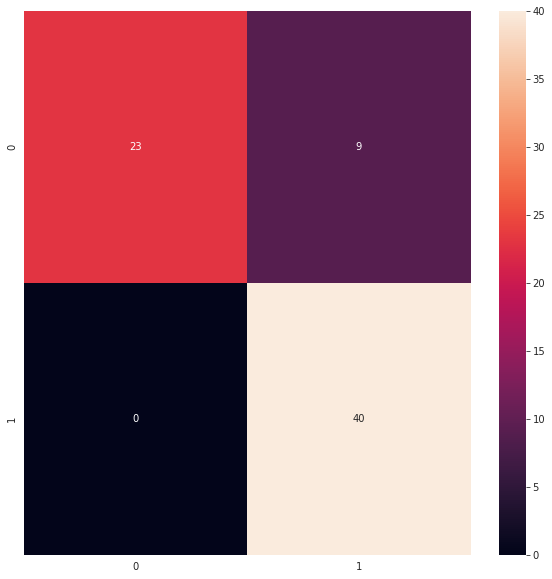

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,svc.predict(X_test)),annot=True)